# Distracted Driving Detection

## Load the Data

In [7]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import os
from sklearn.model_selection import train_test_split

def loadImages(path):
    data = load_files(path)
    files = data['filenames']
    targets = data['target']
    target_names = data['target_names']
    return files, targets, target_names
    
path = "images/train"
files,targets,target_names = loadImages(path)
test_files = np.array(glob("images/test/*"))
test_files = test_files[1:1000]
print('Number of Categories: ', len(target_names))
print('Categories: ', target_names)
print('Number of images by category: ')
for c in target_names:
    print(c + ':' + str(len( os.listdir(path+'/'+c))))
# train_data = np.vstack((files, targets)).T
# print(train_data.shape)

#Split the original training sets into training & validation sets
train_files, valid_files, train_targets, valid_targets = train_test_split(files[1:500], targets[1:500], test_size=0.25, random_state=42)

print(train_files.shape, valid_files.shape, train_targets.shape, valid_targets.shape)
print(len(test_files))


('Number of Categories: ', 10)
('Categories: ', ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
Number of images by category: 
c0:1900
c1:1900
c2:1900
c3:1900
c4:1900
c5:1900
c6:1900
c7:1900
c8:1900
c9:1900
((374,), (125,), (374,), (125,))
999


# Data Analysis

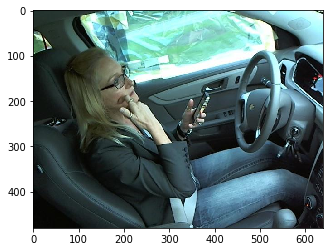

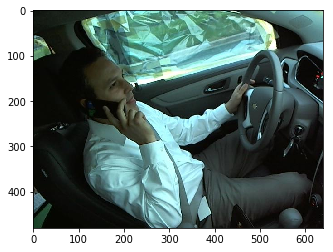

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(1,3):
    sample_image = cv2.imread(train_files[i])
    gray = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
    
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()


In [9]:

#(nb_samples,rows,columns,channels)
#nb_samples - total number of images
# Resize image to 224x224 
# Convert image to an array -> resized to a 4D tensor used by Keras CNN
# Tensor will be (1,224,224,3)

#Adopted from the Deep Learning Project
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


## Pre-Process the Data


In [10]:
#Rescale the images 

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 

train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255


100%|██████████| 999/999 [00:05<00:00, 169.55it/s]


## Baseline Model Architecture

In [34]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D 
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.utils import plot_model

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=10, kernel_size=(4,4), input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=None, padding='valid', data_format=None))
model.add(Conv2D(filters=10, kernel_size=(4,4), input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=None, padding='valid', data_format=None))
model.add(Conv2D(filters=10, kernel_size=(4,4), input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=None, padding='valid', data_format=None))
model.add(GlobalAveragePooling2D())
model.add(Dense(units=10, activation='softmax'))
model.add(Dense(units=10, activation='softmax'))
model.add(Dense(units=10, activation='softmax'))
model.summary()


# plot_model(model, to_file='model.png')

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 221, 221, 10)      490       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 10)        1610      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 10)        1610      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 10)                0         
__________

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Model

In [ ]:
from keras.callbacks import ModelCheckpoint  
from keras.utils import np_utils

print("Train Targets", train_targets)
print ("Valid Targets", valid_targets)
train_targets_onehot = np_utils.to_categorical(np.array(train_targets),10)
valid_targets_onehot = np_utils.to_categorical(np.array(valid_targets),10)
print ("Train Targets One-hot encoded", train_targets_onehot)
print ("Valid Targets One-hot encoded", valid_targets_onehot)

epochs = 100

### Do NOT modify the code below this line.

# checkpointer = ModelCheckpoint(filepath='C:/Users/pushkar/ML/machine_learning/projects/capstone/saved_models/weights.best.from_scratch.hdf5', 
#                                 verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets_onehot, 
          validation_data=(valid_tensors, valid_targets_onehot),
          epochs=epochs, batch_size=32, callbacks=[], verbose=1)

('Train Targets', array([3, 3, 2, 2, 0, 4, 5, 0, 4, 6, 6, 0, 1, 4, 2, 2, 4, 4, 3, 2, 8, 9,
       3, 5, 2, 0, 8, 8, 2, 7, 2, 8, 8, 9, 1, 5, 0, 9, 7, 8, 5, 8, 6, 9,
       6, 5, 2, 4, 2, 7, 9, 6, 0, 3, 3, 1, 5, 3, 8, 6, 3, 4, 8, 7, 5, 3,
       4, 1, 6, 2, 4, 3, 5, 9, 4, 4, 3, 9, 5, 4, 9, 7, 0, 4, 4, 9, 9, 2,
       6, 0, 0, 6, 7, 4, 5, 0, 6, 5, 9, 1, 1, 8, 9, 3, 3, 0, 0, 6, 1, 8,
       0, 3, 2, 2, 9, 4, 3, 0, 7, 8, 4, 5, 4, 7, 3, 5, 2, 3, 4, 3, 3, 2,
       5, 7, 4, 2, 1, 8, 3, 0, 8, 5, 7, 2, 9, 8, 3, 9, 2, 2, 1, 6, 0, 2,
       2, 5, 9, 1, 8, 0, 1, 8, 8, 4, 0, 9, 4, 8, 5, 6, 6, 9, 7, 7, 8, 1,
       7, 3, 4, 3, 6, 6, 6, 7, 2, 6, 5, 3, 3, 0, 9, 7, 4, 8, 5, 1, 8, 2,
       1, 3, 5, 3, 1, 8, 8, 9, 0, 2, 0, 5, 7, 2, 5, 6, 0, 5, 9, 8, 5, 9,
       2, 5, 1, 9, 8, 6, 1, 6, 4, 0, 8, 8, 1, 8, 6, 7, 4, 9, 7, 3, 8, 9,
       5, 5, 7, 6, 3, 2, 5, 9, 7, 7, 3, 3, 6, 6, 8, 3, 5, 2, 0, 8, 8, 5,
       0, 8, 0, 8, 3, 8, 5, 1, 6, 9, 8, 2, 3, 1, 6, 6, 4, 8, 5, 2, 5, 6,
       1, 6, 3, 8, 7, 3, 9, 4, 5,

In [37]:

loss_and_metrics = model.evaluate(valid_tensors, valid_targets_onehot, batch_size=128)

classes = model.predict(test_tensors, batch_size=128)

125/125 [==============================] - 4s 35ms/step


In [38]:
print(loss_and_metrics)

print(classes)
print(classes.shape)
print(classes[1:10,:])

[2.311485528945923, 0.09600000083446503]
[[0.10139585 0.07904729 0.09682291 ... 0.10234685 0.11533477 0.09917917]
 [0.10129388 0.07899415 0.097106   ... 0.10204285 0.11534346 0.09950349]
 [0.10137019 0.07883806 0.09687981 ... 0.10205444 0.11549262 0.09951647]
 ...
 [0.10130559 0.07907514 0.09713455 ... 0.10219103 0.11523546 0.09943486]
 [0.10141785 0.07888016 0.09671624 ... 0.10227736 0.11543699 0.09932034]
 [0.10148643 0.07890659 0.09649061 ... 0.10240635 0.11549512 0.0990698 ]]
(999, 10)
[[0.10129388 0.07899415 0.097106   0.11098032 0.09736238 0.09860907
  0.09876444 0.10204285 0.11534346 0.09950349]
 [0.10137019 0.07883806 0.09687981 0.11098778 0.09749466 0.09866863
  0.09869737 0.10205444 0.11549262 0.09951647]
 [0.10137289 0.07908663 0.09689335 0.11103736 0.0973348  0.0986365
  0.09885972 0.10227322 0.11534124 0.09916424]
 [0.10142567 0.07863002 0.0965546  0.11111297 0.09765398 0.09878229
  0.09861889 0.10198645 0.11570174 0.09953338]
 [0.1013464  0.07874316 0.09685523 0.11101213 